<h1><center>MNIST classification using Keras<center></h1>
    
### By Daniel Deutsch and Kevin Kühl

# Importing Keras

In [1]:
# Importing the Keras main module forcing tensorflow 1.x backend
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.4.1
Using keras version 2.4.3


In [2]:
# Matplotlib styles
plt.style.use('ggplot')
plt.rcParams.update({
    'figure.figsize': (15, 4),
    'axes.prop_cycle': plt.cycler(color=["#4C72B0", "#C44E52", "#55A868", "#8172B2", "#CCB974", "#64B5CD"]),
    'axes.facecolor': "#EAEAF2"
})

## Loading and preparing the MNIST dataset

Again, load the dataset via ```keras.datasets```, turn train and test labels into one-hot encoding, and reshape and normalize data as in the first exercise. 

In [3]:
from keras.datasets import mnist
# START CODE HERE
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f"X_train size: {train_images.shape[0]} samples")
print(f"y_train size: {train_labels.shape[0]} samples")
print(f"X_test size: {test_images.shape[0]} samples")
print(f"y_test size: {test_labels.shape[0]} samples")
# END CODE HERE

X_train size: 60000 samples
y_train size: 60000 samples
X_test size: 10000 samples
y_test size: 10000 samples


In [4]:
from keras.utils.np_utils import to_categorical
# START CODE HERE
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
# END CODE HERE

In [5]:
# Reshape to proper images with 1 color channel according to backend scheme
img_rows, img_cols = train_images.shape[1], train_images.shape[2]
train_images = train_images.reshape((train_images.shape[0], img_rows*img_cols))
# START CODE HERE
test_images = test_images.reshape((test_images.shape[0], img_rows*img_cols))
# END CODE HERE

# Cast pixels from uint8 to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Now let us normalize the images so that they have zero mean and standard deviation
# Hint: are real testing data statistics known at training time ?
# START CODE HERE

mean = np.mean(train_images)
std = np.std(train_images) + 1e-7

train_images = (train_images - mean)/std
test_images = (test_images - mean)/std
# END CODE HERE

## Defining the neural network architecture (i.e., the network model)

You can take a look at this [cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras_Cheat_Sheet_Python.pdf) for some basic commands to use keras.

First, try to replicate the classifier of the first exercise. Secondly, create a fully connected network.
For the fully connected layer, you can for example use this architecture: 
$$ (784) \rightarrow (300) \rightarrow (10) $$
For this first implementation of the network, use only sigmoid activations in the hidden layer. Remember to use the right output activation function ! 

In [6]:
# The Sequential module is a container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

# Original Network
#input_shape = train_images.shape[1]
#output_shape = 10
#model = Sequential()
#model.add(Dense(output_shape, activation='softmax'))

# START CODE HERE
input_shape = train_images.shape[1]
output_shape = 10
model = Sequential()
model.add(Dense(300, input_dim=input_shape, activation='sigmoid'))
model.add(Dense(output_shape, activation='softmax'))
# END CODE HERE

Instantiate a SGD optimizer with a tentative learning rate of $\\eta = 10^{-2}$ and, using the appropriate loss function (which is called, in keras, ```'categorical_crossentropy'```) and compile the model.

In [7]:
# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to the computed error gradints
from keras import optimizers

# START CODE HERE
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# END CODE HERE
# We can now have a look at the defined model topology
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


## Training the network

Train the model for 10 epochs using the ```.fit()``` method, validating the model at each epoch and keeping track of the training history for later plotting. Make sure you enable ```.fit()``` verbose mode in order to visualize the training.

In order to accelerate training, use the ```batch_size``` option of ```.fit()```, which will process a batch of examples at the same time, and make one update for all of them, averaged over the gradients for each training example of the batch. You can begin with a small size, and experiment with a larger size later.

In [8]:
from keras.callbacks import History 
history = History()

# This is where the actual training-testing happens
# Number of epochs we want to train
epochs = 10

# START CODE HERE
history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels), validation_freq=1, batch_size=10, verbose=1)
# END CODE HERE

Epoch 1/10
6000/6000 [==============================] - 7s 1ms/step - loss: 0.7311 - accuracy: 0.8069 - val_loss: 0.2983 - val_accuracy: 0.9163
Epoch 2/10
6000/6000 [==============================] - 6s 987us/step - loss: 0.2913 - accuracy: 0.9178 - val_loss: 0.2471 - val_accuracy: 0.9314
Epoch 3/10
6000/6000 [==============================] - 6s 1ms/step - loss: 0.2444 - accuracy: 0.9299 - val_loss: 0.2163 - val_accuracy: 0.9394
Epoch 4/10
6000/6000 [==============================] - 7s 1ms/step - loss: 0.2028 - accuracy: 0.9425 - val_loss: 0.1906 - val_accuracy: 0.9455
Epoch 5/10
6000/6000 [==============================] - 7s 1ms/step - loss: 0.1799 - accuracy: 0.9490 - val_loss: 0.1686 - val_accuracy: 0.9523
Epoch 6/10
6000/6000 [==============================] - 7s 1ms/step - loss: 0.1614 - accuracy: 0.9548 - val_loss: 0.1553 - val_accuracy: 0.9550
Epoch 7/10
6000/6000 [==============================] - 7s 1ms/step - loss: 0.1426 - accuracy: 0.9597 - val_loss: 0.1414 - val_accurac

## Visualizing the network performance

Visualize the training history using the ```pyplot``` package:
- In one graph, plot the train and vaidation loss functions,
- In another graph, the train and validation accuracy.
By comparing the training the testing curves, what can we conclude about the quality of the training ?

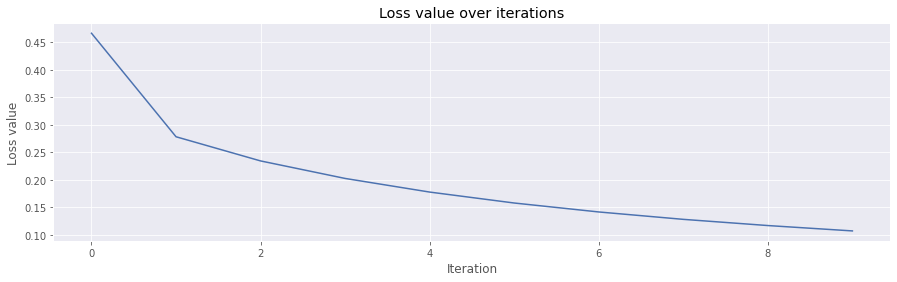

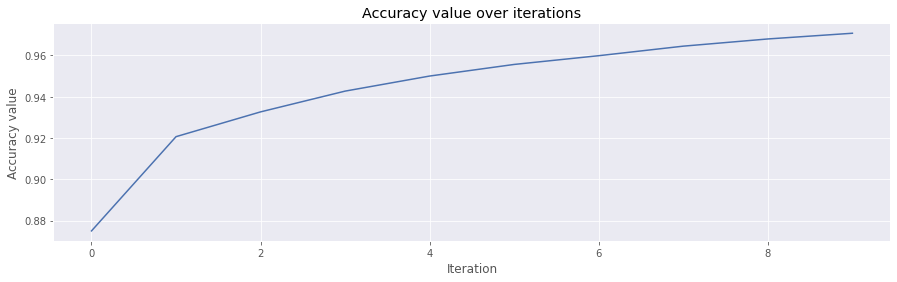

In [9]:
# We now want to plot the train and validation loss functions and accuracy curves
#print(history.history.keys())

# summarize history for loss
# START CODE HERE
plt.plot(np.arange(len(history.history["loss"])), history.history["loss"])
plt.title("Loss value over iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss value")
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE
plt.plot(np.arange(len(history.history["accuracy"])), history.history["accuracy"])
plt.title("Accuracy value over iterations")
plt.xlabel("Iteration")
plt.ylabel("Accuracy value")
# END CODE HERE
plt.show()


In [10]:
print(f"Accuracy value for Training dataset with base model:{history.history['accuracy'][-1]:.3f}")
print(f"Loss value for Training dataset with base model:{history.history['loss'][-1]:.3f}")
print(f"Accuracy value for Testing dataset with base model:{history.history['val_accuracy'][-1]:.3f}")
print(f"Loss value for Testing dataset with base model:{history.history['val_loss'][-1]:.3f}")

Accuracy value for Training dataset with base model:0.971
Loss value for Training dataset with base model:0.107
Accuracy value for Testing dataset with base model:0.967
Loss value for Testing dataset with base model:0.114


## Experiments

Note down the performance of the larger network in terms of training and validation accuracy as a reference (save the loss/accuracy graphs of the network).

Then, experiment as follow and compare performance with the reference scenario:

*  Experiment increasing the size of the batch and compare the performance with reference.
*  Experiment replacing the sigmoid activations with Relus and note what happens.
*  Experiment with a larger architecture, for example: 
$$ (784) \rightarrow (300) \rightarrow (128) \rightarrow (84) \rightarrow (10) $$

### Increasing batch size

In [11]:
history_batch_chg = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels), validation_freq=1, batch_size=100, verbose=1)

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0987 - accuracy: 0.9736 - val_loss: 0.1121 - val_accuracy: 0.9675
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0975 - accuracy: 0.9740 - val_loss: 0.1109 - val_accuracy: 0.9677
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0967 - accuracy: 0.9743 - val_loss: 0.1105 - val_accuracy: 0.9680
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0959 - accuracy: 0.9746 - val_loss: 0.1098 - val_accuracy: 0.9683
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0951 - accuracy: 0.9748 - val_loss: 0.1093 - val_accuracy: 0.9685
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0944 - accuracy: 0.9751 - val_loss: 0.1087 - val_accuracy: 0.9686
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0937 - accuracy: 0.9753 - val_loss: 0.1079 - val_accuracy: 0.9682
Epoch 

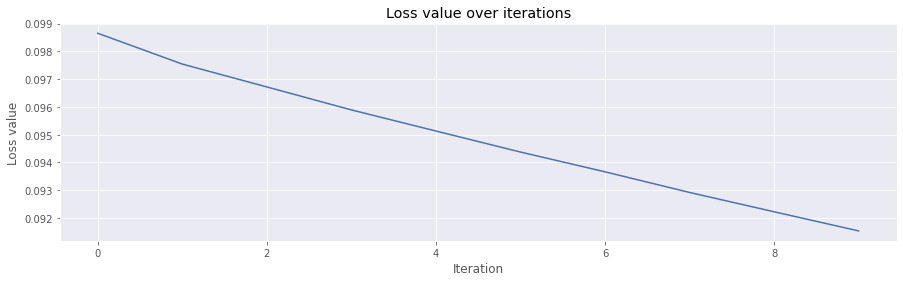

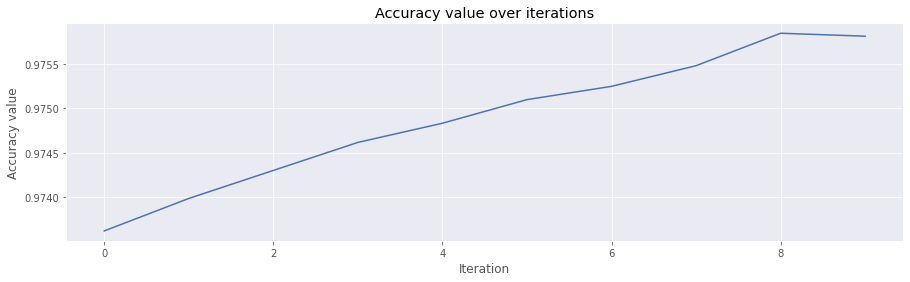

In [12]:
# We now want to plot the train and validation loss functions and accuracy curves
#print(history.history.keys())

# summarize history for loss
# START CODE HERE
plt.plot(np.arange(len(history_batch_chg.history["loss"])), history_batch_chg.history["loss"])
plt.title("Loss value over iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss value")
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE
plt.plot(np.arange(len(history_batch_chg.history["accuracy"])), history_batch_chg.history["accuracy"])
plt.title("Accuracy value over iterations")
plt.xlabel("Iteration")
plt.ylabel("Accuracy value")
# END CODE HERE
plt.show()

In [13]:
print(f"Accuracy value for Training dataset with greater batch size model:{history_batch_chg.history['accuracy'][-1]:.3f}")
print(f"Loss value for Training dataset with greater batch size model:{history_batch_chg.history['loss'][-1]:.3f}")
print(f"Accuracy value for Testing dataset with greater batch size model:{history_batch_chg.history['val_accuracy'][-1]:.3f}")
print(f"Loss value for Testing dataset with greater batch size model:{history_batch_chg.history['val_loss'][-1]:.3f}")

Accuracy value for Training dataset with greater batch size model:0.976
Loss value for Training dataset with greater batch size model:0.092
Accuracy value for Testing dataset with greater batch size model:0.969
Loss value for Testing dataset with greater batch size model:0.106


### Changing model from Sigmoid activations to ReLu

In [14]:
model = Sequential()
model.add(Dense(300, input_dim=input_shape, activation='relu'))
model.add(Dense(output_shape, activation='softmax'))
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# END CODE HERE
# We can now have a look at the defined model topology
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [15]:
history_activations_chg = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels), validation_freq=1, batch_size=10, verbose=1)

Epoch 1/10
6000/6000 [==============================] - 9s 1ms/step - loss: 0.3767 - accuracy: 0.8881 - val_loss: 0.1357 - val_accuracy: 0.9606
Epoch 2/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.1187 - accuracy: 0.9663 - val_loss: 0.0978 - val_accuracy: 0.9702
Epoch 3/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0817 - accuracy: 0.9761 - val_loss: 0.0831 - val_accuracy: 0.9740
Epoch 4/10
6000/6000 [==============================] - 9s 1ms/step - loss: 0.0599 - accuracy: 0.9833 - val_loss: 0.0771 - val_accuracy: 0.9760
Epoch 5/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0442 - accuracy: 0.9884 - val_loss: 0.0709 - val_accuracy: 0.9793
Epoch 6/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0364 - accuracy: 0.9911 - val_loss: 0.0688 - val_accuracy: 0.9780
Epoch 7/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0290 - accuracy: 0.9929 - val_loss: 0.0652 - val_accuracy

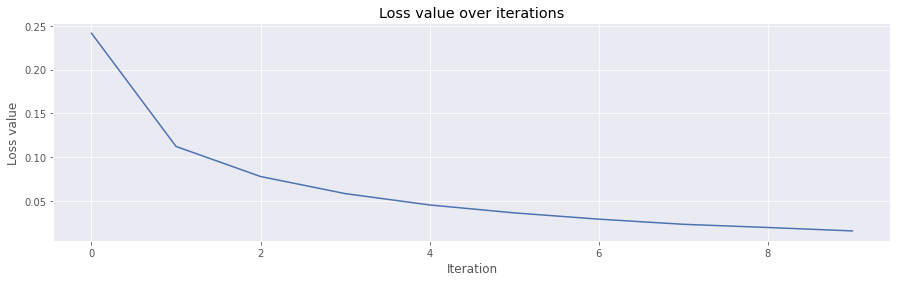

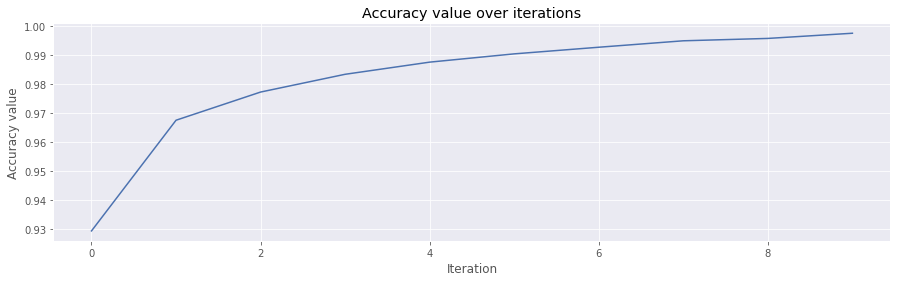

In [17]:
# We now want to plot the train and validation loss functions and accuracy curves
#print(history.history.keys())

# summarize history for loss
# START CODE HERE
plt.plot(np.arange(len(history_activations_chg.history["loss"])), history_activations_chg.history["loss"])
plt.title("Loss value over iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss value")
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE
plt.plot(np.arange(len(history_activations_chg.history["accuracy"])), history_activations_chg.history["accuracy"])
plt.title("Accuracy value over iterations")
plt.xlabel("Iteration")
plt.ylabel("Accuracy value")
# END CODE HERE
plt.show()

In [18]:
print(f"Accuracy value for Training dataset with ReLu activation model:{history_activations_chg.history['accuracy'][-1]:.3f}")
print(f"Loss value for Training dataset with ReLu activation model:{history_activations_chg.history['loss'][-1]:.3f}")
print(f"Accuracy value for Testing dataset with ReLu activation model:{history_activations_chg.history['val_accuracy'][-1]:.3f}")
print(f"Loss value for Testing dataset with ReLu activation model:{history_activations_chg.history['val_loss'][-1]:.3f}")

Accuracy value for Training dataset with ReLu activation model:0.997
Loss value for Training dataset with ReLu activation model:0.016
Accuracy value for Testing dataset with ReLu activation model:0.980
Loss value for Testing dataset with ReLu activation model:0.064


### Projecting a bigger architecture

In [19]:
model = Sequential()
model.add(Dense(300, input_dim=input_shape, activation='sigmoid'))
model.add(Dense(128, input_dim=input_shape, activation='sigmoid'))
model.add(Dense(84, input_dim=input_shape, activation='sigmoid'))
model.add(Dense(output_shape, activation='softmax'))
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# END CODE HERE
# We can now have a look at the defined model topology
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               38528     
_________________________________________________________________
dense_6 (Dense)              (None, 84)                10836     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                850       
Total params: 285,714
Trainable params: 285,714
Non-trainable params: 0
_________________________________________________________________


In [20]:
history_architecture_chg = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels), validation_freq=1, batch_size=10, verbose=1)

Epoch 1/10
6000/6000 [==============================] - 9s 1ms/step - loss: 2.0368 - accuracy: 0.3359 - val_loss: 0.7524 - val_accuracy: 0.8189
Epoch 2/10
6000/6000 [==============================] - 9s 1ms/step - loss: 0.6326 - accuracy: 0.8360 - val_loss: 0.4006 - val_accuracy: 0.8901
Epoch 3/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.3803 - accuracy: 0.8945 - val_loss: 0.3076 - val_accuracy: 0.9106
Epoch 4/10
6000/6000 [==============================] - 9s 1ms/step - loss: 0.2998 - accuracy: 0.9135 - val_loss: 0.2593 - val_accuracy: 0.9237
Epoch 5/10
6000/6000 [==============================] - 9s 2ms/step - loss: 0.2567 - accuracy: 0.9272 - val_loss: 0.2264 - val_accuracy: 0.9363
Epoch 6/10
6000/6000 [==============================] - 9s 2ms/step - loss: 0.2142 - accuracy: 0.9379 - val_loss: 0.1977 - val_accuracy: 0.9417
Epoch 7/10
6000/6000 [==============================] - 9s 2ms/step - loss: 0.1880 - accuracy: 0.9462 - val_loss: 0.1753 - val_accuracy:

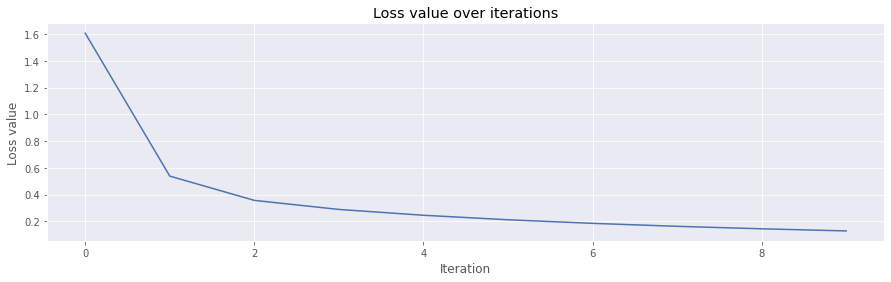

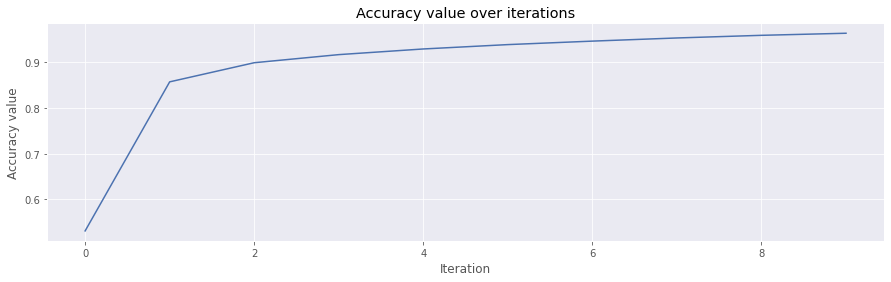

In [21]:
# We now want to plot the train and validation loss functions and accuracy curves
#print(history.history.keys())

# summarize history for loss
# START CODE HERE
plt.plot(np.arange(len(history_architecture_chg.history["loss"])), history_architecture_chg.history["loss"])
plt.title("Loss value over iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss value")
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE
plt.plot(np.arange(len(history_architecture_chg.history["accuracy"])), history_architecture_chg.history["accuracy"])
plt.title("Accuracy value over iterations")
plt.xlabel("Iteration")
plt.ylabel("Accuracy value")
# END CODE HERE
plt.show()

In [22]:
print(f"Accuracy value for Training dataset with bigger architecture model:{history.history['accuracy'][-1]:.3f}")
print(f"Loss value for Training dataset with bigger architecture model:{history.history['loss'][-1]:.3f}")
print(f"Accuracy value for Testing dataset with bigger architecture model:{history.history['val_accuracy'][-1]:.3f}")
print(f"Loss value for Testing dataset with bigger architecture model:{history.history['val_loss'][-1]:.3f}")

Accuracy value for Training dataset with bigger architecture model:0.971
Loss value for Training dataset with bigger architecture model:0.107
Accuracy value for Testing dataset with bigger architecture model:0.967
Loss value for Testing dataset with bigger architecture model:0.114


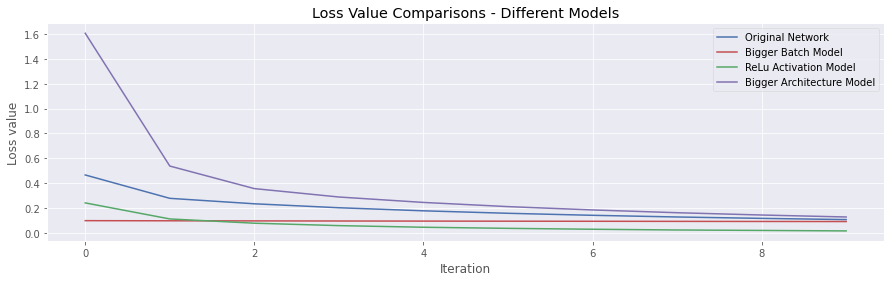

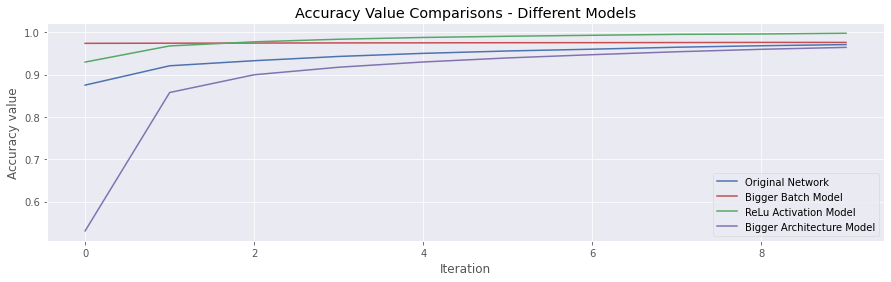

In [24]:
# Plots The accuray and loss function of all cases
plt.plot(np.arange(len(history.history["loss"])), history.history["loss"], label="Original Network")
plt.plot(np.arange(len(history_batch_chg.history["loss"])), history_batch_chg.history["loss"], label="Bigger Batch Model")
plt.plot(np.arange(len(history_activations_chg.history["loss"])), history_activations_chg.history["loss"], label="ReLu Activation Model")
plt.plot(np.arange(len(history_architecture_chg.history["loss"])), history_architecture_chg.history["loss"], label="Bigger Architecture Model")
plt.title("Loss Value Comparisons - Different Models")
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.legend()
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE
plt.plot(np.arange(len(history.history["accuracy"])), history.history["accuracy"], label="Original Network")
plt.plot(np.arange(len(history_batch_chg.history["accuracy"])), history_batch_chg.history["accuracy"], label="Bigger Batch Model")
plt.plot(np.arange(len(history_activations_chg.history["accuracy"])), history_activations_chg.history["accuracy"], label="ReLu Activation Model")
plt.plot(np.arange(len(history_architecture_chg.history["accuracy"])), history_architecture_chg.history["accuracy"], label="Bigger Architecture Model")
plt.title("Accuracy Value Comparisons - Different Models")
plt.xlabel("Iteration")
plt.ylabel("Accuracy value")
plt.legend()
# END CODE HERE
plt.show()

By comparing the obtained results from the experiments with the results from original network considering the ceteris paribus condition, we can conclude the following:

- If one increases the batch size, the faster the loss value will tend to stabilize (since with batch_size=100 we obtained almost a straight line in the plot above).
- Another result that comes with an increase in the batch size is the accuracy of the model, that tends to stabilize in a higher value much faster.
- When using ReLu instead of Sigmoid activations, we obtained a better accuracy with a smaller number of iterations needed.
- With a larger architecture the loss value and the accuracy tends to stabilize a bit slower.